In [ ]:
#imports
import numpy
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline


#stopwords needs to be downloaded
nltk.download('stopwords')  


#reading from files
messages = pd.read_csv('train2.tsv',sep = '\t',names = ['ID','label','statement','subject','speaker','speaker\'s job title','state','party','barely true counts','false counts', 'half true counts','mostly true counts','pants on fire counts','context','justification'])
test_messages = pd.read_csv('test2.tsv',sep = '\t',names = ['ID','label','statement','subject','speaker','speaker\'s job title','state','party','barely true counts','false counts', 'half true counts','mostly true counts','pants on fire counts','context','justification'])


#DEALING WITH THE MISSING DATA
messages['speaker\'s job title'].fillna('NA',inplace = True)
messages['state'].fillna('NA',inplace = True)
messages['context'].fillna('NA',inplace = True)
messages.dropna(inplace = True)
test_messages['speaker\'s job title'].fillna('NA',inplace = True)
test_messages['state'].fillna('NA',inplace = True)
test_messages['context'].fillna('NA',inplace = True)
test_messages.dropna(inplace = True)


def makeBinary(label):       #TO ADD ANOTHER FEATURE WHICH TELLS WHETHER A STATEMENT IS TRUE OR FALSE
    if label in ['false','barely-true','pants-fire']:
        return 'False'
    else:
        return 'True'
def text_process(msg):      #FOR TEXT DATA CLEANING
    npunct = [c for c in msg if c not in string.punctuation]
    npunct = ''.join(npunct)
    return [w for w in npunct.split() if w.lower() not in stopwords.words('english')]

messages['binary label'] = messages['label'].apply(makeBinary) 
test_messages['binary_label'] = test_messages['label'].apply(makeBinary)


################################################## RANDOM FOREST MODEL ########################################################
#USING RANDOM FOREST CLASSIFIER BY CREATING A PIPELINE
pipeline = Pipeline([('bow',CountVectorizer(analyzer = text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',RandomForestClassifier())
                    ]) 
pipeline.fit(messages['statement'],messages['label'])  #FITTING THE RANDOM FOREST MODEL FOR SIX-WAY FEATURES
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### RANDOM FOREST MODEL FOR SIX-WAY FEATURES ####\n')
print(confusion_matrix(test_messages['label'],pred))   #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['label'],pred))

## SIX-WAY ACCURACY (RANDOM FOREST CLASSIFIER) = 0.21 ## 

pipeline.fit(messages['statement'],messages['binary label'])   #FITTING THE RANDOM FOREST MODEL FOR BINARY FEATURES
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### RANDOM FOREST MODEL FOR BINARY FEATURES ####\n')
print(confusion_matrix(test_messages['binary_label'],pred))    #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['binary_label'],pred))

## BINARY ACCURACY (RANDOM FOREST CLASSIFIER) = 0.58 ## 


################################################## MULTINOMIALNB MODEL ########################################################
#USING MULTINOMIALNB CLASSIFIER BY CREATING THE PIPELINE
pipeline = Pipeline([('bow',CountVectorizer(analyzer = text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
                    ])
pipeline.fit(messages['statement'],messages['label'])   #FITTING THE MULTINOMIALNB MODEL FOR SIX-WAY FEATURES
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### MULTINOMIALNB MODEL FOR SIX-WAY FEATURES ####\n')
print(confusion_matrix(test_messages['label'],pred))   #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['label'],pred))

## SIX-WAY ACCURACY (MULTINOMIALNB CLASSIFIER) = 0.24 ##

pipeline.fit(messages['statement'],messages['binary label'])   #FITTING THE MULTINOMIALNB MODEL FOR BINARY FEATURES
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### MULTINOMIALNB MODEL FOR BINARY FEATURES ####\n')
print(confusion_matrix(test_messages['binary_label'],pred))   #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['binary_label'],pred))

## BINARY ACCURACY (MULTINOMIALNB CLASSIFIER) = 0.60 ## 


################################################## LOGISTIC REGRESSION MODEL ########################################################
#USING LOGISTIC REGRESSION BY CREATING THE PIPELINE
pipeline = Pipeline([('bow',CountVectorizer(analyzer = text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',LogisticRegression())
                    ])
pipeline.fit(messages['statement'],messages['label'])    #FITTING THE LOGISTIC REGRESSION MODEL FOR SIX-WAY FEATURES
pred = pipeline.predict(test_messages['statement'])    #PREDICTING
print('\n\n#### LOGISTIC REGRESSION MODEL FOR SIX-WAY FEATURES ####\n')
print(confusion_matrix(test_messages['label'],pred))    #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['label'],pred))

## SIX-WAY ACCURACY (LOGISTIC REGRESSION) = 0.25 ## 

pipeline.fit(messages['statement'],messages['binary label'])   #FITTING THE LOGISTIC REGRESSION MODEL FOR BINARY FEATURES
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### LOGISTIC REGRESSION MODEL FOR BINARY FEATURES ####\n')
print(confusion_matrix(test_messages['binary_label'],pred))   #EVALUATING THE PREDICTIONS
print('\n')
print(classification_report(test_messages['binary_label'],pred))

## BINARY ACCURACY (LOGISTIC REGRESSION) = 0.61 ## 


############################################################## SVM MODEL ########################################################
#USING SVM AND USING GRIDSEARCHSV TO FIND THE OPTIMUM VALUES FOR SVC PARAMETERS C AND gamma
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
pipeline = Pipeline([('bow',CountVectorizer(analyzer = text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',GridSearchCV(SVC(),param_grid,verbose = 3))
                    ])
pipeline.fit(messages['statement'],messages['label'])   #FITTING THE SVM MODEL FOR SIX-WAY FEATURES (THIS TAKES SOME TIME TO RUN DEPENDING ON COMPUTER SPEED)
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### SVM MODEL FOR SIX-WAY FEATURES ####\n')
print(confusion_matrix(test_messages['label'],pred))
print('\n')
print(classification_report(test_messages['label'],pred))

## SIX-WAY ACCURACY (SVM) = 0.25 ##

pipeline.fit(messages['statement'],messages['binary label'])   #FITTING THE SVM MODEL FOR BINARY FEATURES (THIS TAKES SOME TIME TO RUN DEPENDING ON COMPUTER SPEED)
pred = pipeline.predict(test_messages['statement'])   #PREDICTING
print('\n\n#### SVM MODEL FOR BINARY FEATURES ####\n')
print(confusion_matrix(test_messages['binary_label'],pred))
print('\n')
print(classification_report(test_messages['binary_label'],pred))

## BINARY ACCURACY (SVM) = 0.62 ##


#--------------------------------------------------------------------------------------------------------------------------------

[0.3        0.64646465 0.79212121 0.92787879 1.        ]
[1.         0.85714286 0.66428571 0.36428571 0.3       ]
x0 = 0.8269644261177932
y0 = 0.1515067400431221
c = 0.8485648321569966
k = -9.544422843693193



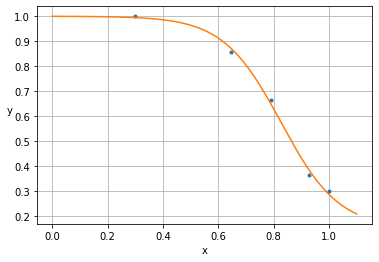

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def sigmoid(p,x):
    x0,y0,c,k=p
    y = c / (1 + np.exp(-k*(x-x0))) + y0
    return y

def residuals(p,x,y):
    return y - sigmoid(p,x)

def resize(arr,lower=0.0,upper=1.0):
    arr=arr.copy()
    if lower>upper: lower,upper=upper,lower
    arr -= arr.min()
    arr *= (upper-lower)/arr.max()
    arr += lower
    return arr

# raw data
x = np.array([821,576,473,377,326],dtype='float')
y = np.array([255,235,208,166,157],dtype='float')

x=resize(-x,lower=0.3)
y=resize(y,lower=0.3)
print(x)
print(y)
p_guess=(np.median(x),np.median(y),1.0,1.0)
p, cov, infodict, mesg, ier = scipy.optimize.leastsq(
    residuals,p_guess,args=(x,y),full_output=1)  

x0,y0,c,k=p
print('''\
x0 = {x0}
y0 = {y0}
c = {c}
k = {k}
'''.format(x0=x0,y0=y0,c=c,k=k))

xp = np.linspace(0, 1.1, 1500)
pxp=sigmoid(p,xp)

# Plot the results
plt.plot(x, y, '.', xp, pxp, '-')
plt.xlabel('x')
plt.ylabel('y',rotation='horizontal') 
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
import seaborn as sns

In [10]:
data = sns.load_dataset('iris')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split()


ValueError: At least one array required as input

In [16]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
data['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [22]:
for i,spec in enumerate(data['species']):
    if(spec == 'setosa'):
        data['species'][i] = 1
    elif(spec == 'versicolor'):
        data['species'][i] = 2
    else:
        data['species'][i] = 3

c:\users\lakshya\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lakshya\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\lakshya\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [25]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [29]:
data.to_csv(r'C:\Users\lakshya\Desktop\iris.csv')

In [30]:
pd.read_csv(r'C:\Users\lakshya\Desktop\iris.csv')

,4.9,3,1.4,0.2,1
0,4.7,3.2,1.3,0.2,1
1,4.6,3.1,1.5,0.2,1
2,5.0,3.6,1.4,0.2,1
3,5.4,3.9,1.7,0.4,1
4,4.6,3.4,1.4,0.3,1
...,...,...,...,...,...
143,6.7,3.0,5.2,2.3,3
144,6.3,2.5,5.0,1.9,3
145,6.5,3.0,5.2,2.0,3
146,6.2,3.4,5.4,2.3,3


In [31]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data,data['species'])

In [33]:
X_train

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,3
137,6.4,3.1,5.5,1.8,3
36,5.5,3.5,1.3,0.2,1
91,6.1,3.0,4.6,1.4,2
73,6.1,2.8,4.7,1.2,2
...,...,...,...,...,...
66,5.6,3.0,4.5,1.5,2
88,5.6,3.0,4.1,1.3,2
43,5.0,3.5,1.6,0.6,1
62,6.0,2.2,4.0,1.0,2


In [34]:
X_test

,sepal_length,sepal_width,petal_length,petal_width,species
54,6.5,2.8,4.6,1.5,2
57,4.9,2.4,3.3,1.0,2
129,7.2,3.0,5.8,1.6,3
2,4.7,3.2,1.3,0.2,1
132,6.4,2.8,5.6,2.2,3
67,5.8,2.7,4.1,1.0,2
60,5.0,2.0,3.5,1.0,2
120,6.9,3.2,5.7,2.3,3
24,4.8,3.4,1.9,0.2,1
90,5.5,2.6,4.4,1.2,2


In [35]:
X_train.to_csv(r'C:\Users\lakshya\Desktop\iris_train.csv')

In [36]:
X_test.to_csv(r'C:\Users\lakshya\Desktop\iris_test.csv')

In [37]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [53]:
data = pd.read_csv(r'C:\Users\lakshya\Documents\GitHub\group27\data\winequality-red.csv',sep = ';')

In [55]:
data.columns = ['A','B','C','D','E','F','G','H','I','J','K','L']

In [42]:
data.columns = ['A','B','C','D','E']

In [57]:
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [58]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,8.320213,0.527713,0.271145,2.539205,0.087474,15.877972,46.475594,0.996746,3.310989,0.658210,10.423623,5.636421
std,1.741489,0.179064,0.194744,1.410279,0.047079,10.462720,32.904142,0.001888,0.154355,0.169542,1.065694,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
